In [1]:
%matplotlib inline

from plotting_helper import plot_gen_intervention_range, interactive_plot

idx = 5
model_name = 'ConditionalVISEM'

interventions = [
    {'sex': 1.},
    {'age': 40.},
    {'age': 92.},
    {'brain_volume': 1600000.},
    {'brain_volume': 800000.},
    {'ventricle_volume': 110.},
    {'ventricle_volume': 400000.},
    {'tau': 85.},
    {'av45': 2.5}, 
    {'education': 20.}, 
    {'moca': 28.}
]

plot_gen_intervention_range(model_name, interventions, idx, normalise_all=True, num_samples=32)

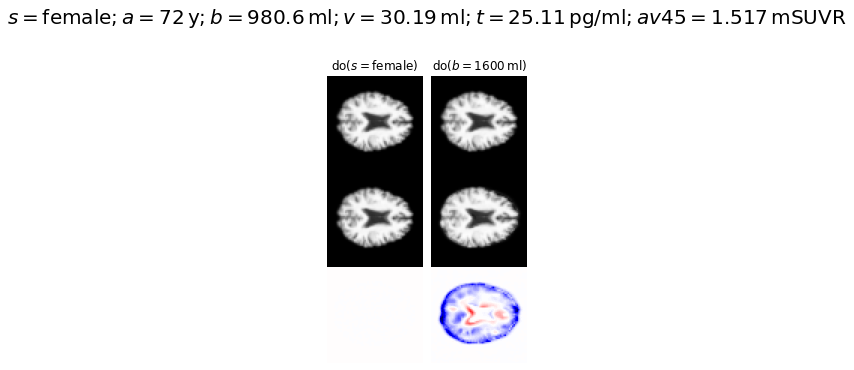

In [6]:
%matplotlib inline

from plotting_helper import plot_gen_intervention_range, interactive_plot

idx = 3
model_name = 'ConditionalVISEM'

interventions = [
    {'sex': 1.},
    {'brain_volume': 1600000.},
]

plot_gen_intervention_range(model_name, interventions, idx, normalise_all=True, num_samples=32, save=True)

In [6]:
%matplotlib inline

from plotting_helper import plot_gen_intervention_range, interactive_plot
model_name = 'ConditionalVISEM'
interactive_plot(model_name)

<Figure size 720x720 with 0 Axes>

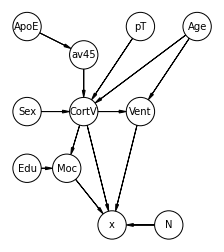

In [1]:
from causalgraphicalmodels import CausalGraphicalModel
import daft
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 10))
gm_DAG = CausalGraphicalModel(
    nodes=["ApoE", "pT", "av45", 'x', 'Age', 'Vent', 'Sex', 'Moc', 'Edu', 'N'],
    edges=[("ApoE", "av45"), ("av45", "CortV"), ("pT", "CortV"), ('CortV', 'x'), ('Age', 'CortV'),
    ('CortV', 'Vent'), ('Age', 'Vent'), ('Sex', 'CortV'), ('Vent', 'x'), ('CortV', 'Moc'), ('Edu', 'Moc'), ('Moc', 'x'),
    ('N', 'x')
    ]
)
coordinates = {"ApoE": (0, 0.5), "av45": (1, 1), "CortV": (1, 2), "pT": (2, 0.5), 'x': (1.5, 4), 'Age': (3, 0.5),
'Vent': (2, 2), 'Sex': (0, 2), 'Moc': (0.7, 3), 'Edu': (0, 3), 'N': (2.5, 4)}
pgm = daft.PGM()
for node in gm_DAG.dag.nodes:
    pgm.add_node(node, node, *coordinates[node])
for edge in gm_DAG.dag.edges:
    pgm.add_edge(*edge)
with plt.rc_context({"figure.constrained_layout.use": False}):
    pgm.render()
plt.gca().invert_yaxis()